# Initial Steps

In [4]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

Loading Data

In [5]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Allot\plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

,quantity
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


# Preparing Data For Data Driven Forecasting

## Importing Required Libraries

In [6]:
from statsmodels.tsa.stattools import adfuller
def ad_test (dataset):
    dftest = adfuller (dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value: ", dftest [1])
    print("3. Num Of Lags : ", dftest [2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest [3])
    print("5. Critical Values :")
    for key, val in dftest [4].items():
        print("\t",key, ": ", val)

In [7]:
ad_test(df['quantity'])

1. ADF :  -0.2680053318620972
2. P-Value:  0.9299150887423024
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 26
5. Critical Values :
	 1% :  -3.7112123008648155
	 5% :  -2.981246804733728
	 10% :  -2.6300945562130176


In [8]:
def adf_test (ds):
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    ds_split = int(len(ds)/2)
    ds1  = ds[0:ds_split]
    ds2 = ds[ds_split:]
    print('Mean 1 - ',ds1.mean())
    print('Mean 2 - ', ds1.mean())
    print('Var 1 - ',ds1.var())
    print('Var 2 ',ds2.var())
    from statsmodels.tsa.stattools import adfuller
    adf_test= adfuller(ds)
    print('ADfuller Statistics - ', adf_test[0])
    print('P value - ',adf_test [1])

In [9]:
adf_test(df['quantity'])

Mean 1 -  12760.666666666666
Mean 2 -  12760.666666666666
Var 1 -  700612.7058823528
Var 2  680987.977124183
ADfuller Statistics -  -0.2680053318620972
P value -  0.9299150887423024


In [10]:
transformed_df = pd.Series(df["quantity"]).diff().dropna()
transformed_df

date
2020-01-01    1923.0
2020-02-01    -812.0
2020-03-01     637.0
2020-04-01   -1137.0
2020-05-01     454.0
2020-06-01    -201.0
2020-07-01     575.0
2020-08-01      -5.0
2020-09-01    -377.0
2020-10-01     644.0
2020-11-01    1052.0
2020-12-01   -1525.0
2021-01-01    1923.0
2021-02-01    -812.0
2021-03-01     637.0
2021-04-01   -1137.0
2021-05-01     454.0
2021-06-01    -200.0
2021-07-01     574.0
2021-08-01      -5.0
2021-09-01    -377.0
2021-10-01     644.0
2021-11-01    1052.0
2021-12-01   -1525.0
2022-01-01    1923.0
2022-02-01    -812.0
2022-03-01     637.0
2022-04-01   -1137.0
2022-05-01     455.0
2022-06-01    -201.0
2022-07-01     574.0
2022-08-01      -4.0
2022-09-01    -378.0
2022-10-01     644.0
2022-11-01    1053.0
Name: quantity, dtype: float64

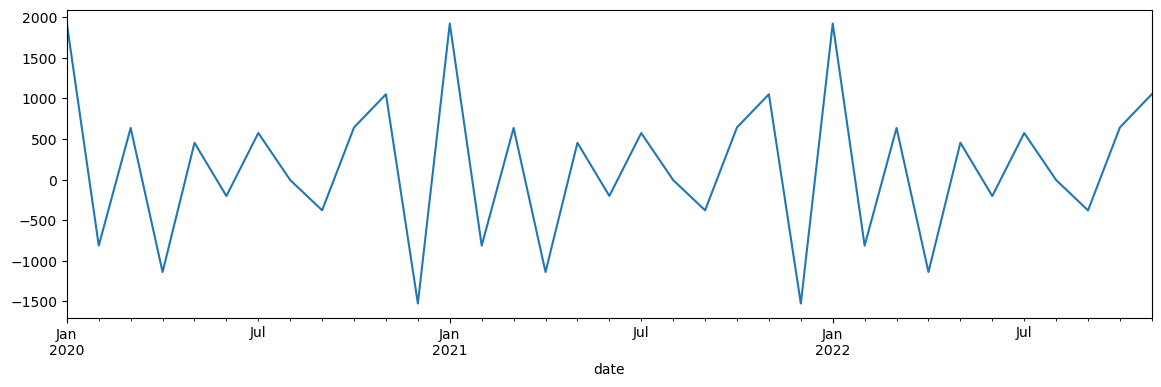

In [11]:
transformed_df.plot(figsize=(14, 4));

In [12]:
ad_test(transformed_df)

1. ADF :  -5568.469550325137
2. P-Value:  0.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 24
5. Critical Values :
	 1% :  -3.7377092158564813
	 5% :  -2.9922162731481485
	 10% :  -2.635746736111111


In [13]:
df1 = pd.DataFrame(transformed_df)
df1

,quantity
date,
2020-01-01,1923.0
2020-02-01,-812.0
2020-03-01,637.0
2020-04-01,-1137.0
2020-05-01,454.0
2020-06-01,-201.0
2020-07-01,575.0
2020-08-01,-5.0
2020-09-01,-377.0


## Splitting Data

In [14]:
Train = df1.drop(df.tail(12).index)
Train

,quantity
date,
2020-01-01,1923.0
2020-02-01,-812.0
2020-03-01,637.0
2020-04-01,-1137.0
2020-05-01,454.0
2020-06-01,-201.0
2020-07-01,575.0
2020-08-01,-5.0
2020-09-01,-377.0


In [15]:
Test = df1.tail(12)
Test

,quantity
date,
2021-12-01,-1525.0
2022-01-01,1923.0
2022-02-01,-812.0
2022-03-01,637.0
2022-04-01,-1137.0
2022-05-01,455.0
2022-06-01,-201.0
2022-07-01,574.0
2022-08-01,-4.0


# Model Building

## 1. ACF Plot

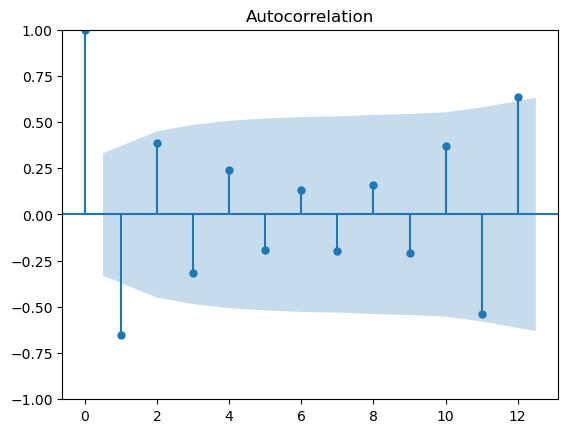

In [16]:
tsa_plots.plot_acf(df1.quantity, lags = 12);

## 2. PACF Plot

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


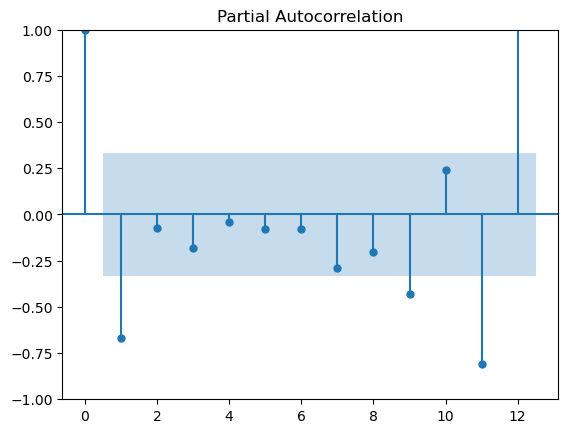

In [17]:
tsa_plots.plot_pacf(df1.quantity,lags = 12);

## 3. ARIMA Model

In [18]:
model1 = ARIMA(Train.quantity, order = (1,1,1))
res1 = model1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -176.211
Date:                Wed, 15 Feb 2023   AIC                            358.422
Time:                        09:37:53   BIC                            361.695
Sample:                    01-01-2020   HQIC                           359.193
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6744      0.173     -3.903      0.000      -1.013      -0.336
ma.L1         -0.9995      0.363     -2.750      0.006      -1.712      -0.287
sigma2      4.491e+05    8.1e-07   5.54e+11      0.0

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
start_index = len(Train)
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)
forecast_test

2021-12-01   -484.572300
2022-01-01    551.700683
2022-02-01   -147.167633
2022-03-01    324.153082
2022-04-01      6.291747
2022-05-01    220.659215
2022-06-01     76.088591
2022-07-01    173.587831
2022-08-01    107.833797
2022-09-01    152.178687
2022-10-01    122.272244
2022-11-01    142.441317
Freq: MS, Name: predicted_mean, dtype: float64

In [20]:
rmse_test = sqrt(mean_squared_error(Test.quantity, forecast_test))
print('Test RMSE: %.3f' % rmse_test)

Test RMSE: 735.803


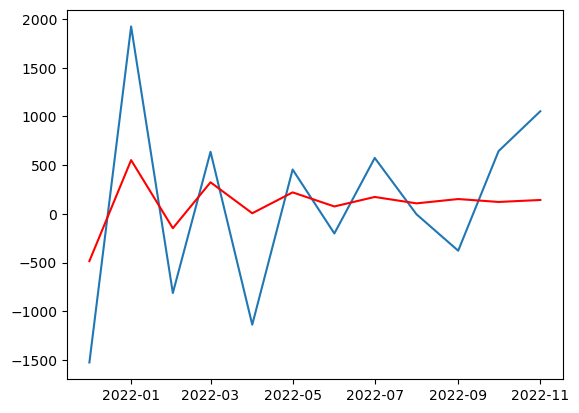

In [21]:
pyplot.plot(Test.quantity)
pyplot.plot(forecast_test, color='red')
pyplot.show()

## 4. Auto ARIMA

In [22]:
import pmdarima as pm
ar_model = pm.auto_arima(Train.quantity, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=381.680, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=370.127, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=380.533, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=371.776, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=370.361, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.044 seconds


In [23]:
model = ARIMA(Train.quantity, order = (1, 0, 0))
res3 = model.fit()
print(res3.summary())

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.065
Date:                Wed, 15 Feb 2023   AIC                            370.129
Time:                        09:37:57   BIC                            373.536
Sample:                    01-01-2020   HQIC                           370.986
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1711     91.444      1.325      0.185     -58.056     300.398
ar.L1         -0.7297      0.155     -4.719      0.000      -1.033      -0.427
sigma2      4.198e+05   1.48e+05      2.832      0.0

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
start_index = len(Train)
end_index = start_index + 11
forecast_best = res3.predict(start=start_index, end=end_index)
forecast_best

2021-12-01   -558.090004
2022-01-01    616.853774
2022-02-01   -240.547290
2022-03-01    385.130805
2022-04-01    -71.450245
2022-05-01    261.734274
2022-06-01     18.596886
2022-07-01    196.023465
2022-08-01     66.548557
2022-09-01    161.031311
2022-10-01     92.083660
2022-11-01    142.397378
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
rmse_best = sqrt(mean_squared_error(Test.quantity, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 696.665


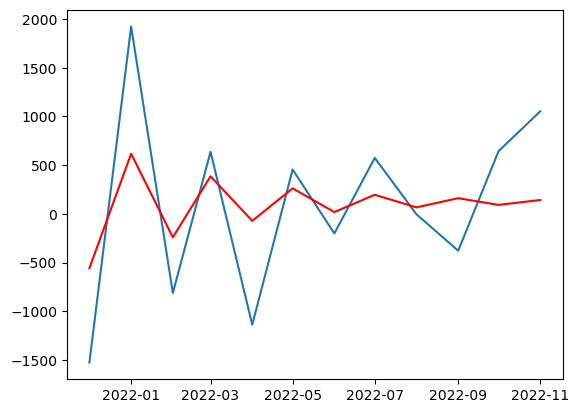

In [26]:
pyplot.plot(Test.quantity)
pyplot.plot(forecast_best, color='red')
pyplot.show()